# CVaR-QRDQN Demo

This notebook demonstrates the training and evaluation of the CVaR-QRDQN model on the CartPole-v1 environment.

Training the CVaR-QRDQN model...
Episode 1/500, Total Reward: 17.0
Episode 2/500, Total Reward: 17.0
Episode 3/500, Total Reward: 17.0
Episode 4/500, Total Reward: 19.0
Episode 5/500, Total Reward: 23.0
Episode 6/500, Total Reward: 9.0
Episode 7/500, Total Reward: 11.0
Episode 8/500, Total Reward: 13.0
Episode 9/500, Total Reward: 19.0
Episode 10/500, Total Reward: 24.0
Episode 11/500, Total Reward: 17.0
Episode 12/500, Total Reward: 17.0
Episode 13/500, Total Reward: 37.0
Episode 14/500, Total Reward: 13.0
Episode 15/500, Total Reward: 30.0
Episode 16/500, Total Reward: 12.0
Episode 17/500, Total Reward: 43.0
Episode 18/500, Total Reward: 13.0
Episode 19/500, Total Reward: 13.0
Episode 20/500, Total Reward: 20.0
Episode 21/500, Total Reward: 15.0
Episode 22/500, Total Reward: 10.0
Episode 23/500, Total Reward: 17.0
Episode 24/500, Total Reward: 29.0
Episode 25/500, Total Reward: 58.0
Episode 26/500, Total Reward: 24.0
Episode 27/500, Total Reward: 23.0
Episode 28/500, Total Reward: 9.

G:\我的雲端硬碟\Academic\PhD\Projects\RL Demo\CVaR-QRDQN\evaluate.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  agent.model.load_state_dict(torch.load(model_path))
C:\Users

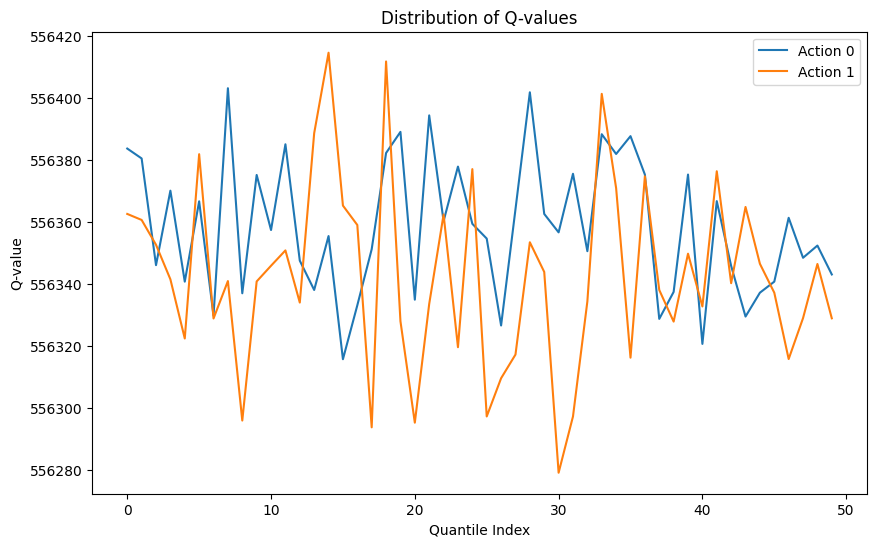

In [1]:
# -*- coding: utf-8 -*-
"""
Training script for CVaR-QRDQN
"""

import os
os.chdir(r'G:\我的雲端硬碟\Academic\PhD\Projects\RL Demo\CVaR-QRDQN')
import numpy as np
import torch
import matplotlib.pyplot as plt
from environment import create_environment
from agent import Agent
from evaluate import evaluate


def train(env_name, num_episodes, max_steps, epsilon_start, epsilon_end, epsilon_decay, lr, gamma, cvar_alpha, num_quantiles):
    env = create_environment(env_name)
    agent = Agent(env.observation_space.shape[0], env.action_space.n, num_quantiles, lr, gamma, cvar_alpha)

    epsilon = epsilon_start
    for episode in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0

        for step in range(max_steps):
            action = agent.select_action(state, epsilon)
            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward
            
            states, actions, rewards, next_states, dones = \
                np.array(state)[np.newaxis, :], np.array([action])[np.newaxis, :], np.array([reward])[np.newaxis, :], np.array(next_state)[np.newaxis, :], np.array([done], dtype=np.bool_)[np.newaxis, :]
            agent.update(batch=(states, actions, rewards, next_states, dones))

            state = next_state
            if done:
                break

        epsilon = max(epsilon_end, epsilon * epsilon_decay)
        print(f"Episode {episode + 1}/{num_episodes}, Total Reward: {total_reward}")

    # Save the model
    torch.save(agent.model.state_dict(), "cvar_qrdqn_model.pth")

if __name__ == "__main__":
    env_name = "CartPole-v1"
    num_episodes = 500
    max_steps = 200
    epsilon_start = 1.0
    epsilon_end = 0.01
    epsilon_decay = 0.995
    lr = 0.001
    gamma = 0.99
    cvar_alpha = 0.1
    num_quantiles = 50

    # Train the model
    print("Training the CVaR-QRDQN model...")
    train(env_name, num_episodes, max_steps, epsilon_start, epsilon_end, epsilon_decay, lr, gamma, cvar_alpha, num_quantiles)

    # Evaluate the model
    model_path = "cvar_qrdqn_model.pth"
    num_eval_episodes = 10
    print("Evaluating the CVaR-QRDQN model...")
    evaluate(env_name, model_path, num_eval_episodes, max_steps, num_quantiles)

    # Create environment and agent
    env = create_environment(env_name)
    agent = Agent(env.observation_space.shape[0], env.action_space.n, num_quantiles, lr, gamma, cvar_alpha)
    agent.model.load_state_dict(torch.load(model_path))

    # Display Q-values for a sample state
    state, info = env.reset()
    state_tensor = torch.FloatTensor(state).unsqueeze(0)
    quantiles = agent.model(state_tensor)
    q_values = quantiles.mean(dim=-1).detach().numpy()
    print("Q-values for the sample state:", q_values)

    # Plot the distribution of Q-values
    plt.figure(figsize=(10, 6))
    for action in range(env.action_space.n):
        plt.plot(quantiles[0, action, :].detach().numpy(), label=f'Action {action}')
    plt.xlabel('Quantile Index')
    plt.ylabel('Q-value')
    plt.title('Distribution of Q-values')
    plt.legend()
    plt.show()

In [2]:
# Import necessary libraries
import numpy as np
import torch
import matplotlib.pyplot as plt
from train import train
from evaluate import evaluate
from environment import create_environment
from agent import Agent

## Training the CVaR-QRDQN Model

In [3]:
# Training parameters
env_name = "CartPole-v1"
num_episodes = 500
max_steps = 200
epsilon_start = 1.0
epsilon_end = 0.01
epsilon_decay = 0.995
lr = 0.001
gamma = 0.99
cvar_alpha = 0.1
num_quantiles = 50

# Train the model
print("Training the CVaR-QRDQN model...")
train(env_name, num_episodes, max_steps, epsilon_start, epsilon_end, epsilon_decay, lr, gamma, cvar_alpha, num_quantiles)

Training the CVaR-QRDQN model...
Episode 1/500, Total Reward: 36.0
Episode 2/500, Total Reward: 32.0
Episode 3/500, Total Reward: 17.0
Episode 4/500, Total Reward: 15.0
Episode 5/500, Total Reward: 42.0
Episode 6/500, Total Reward: 11.0
Episode 7/500, Total Reward: 27.0
Episode 8/500, Total Reward: 12.0
Episode 9/500, Total Reward: 15.0
Episode 10/500, Total Reward: 24.0
Episode 11/500, Total Reward: 36.0
Episode 12/500, Total Reward: 14.0
Episode 13/500, Total Reward: 29.0
Episode 14/500, Total Reward: 28.0
Episode 15/500, Total Reward: 25.0
Episode 16/500, Total Reward: 21.0
Episode 17/500, Total Reward: 16.0
Episode 18/500, Total Reward: 19.0
Episode 19/500, Total Reward: 32.0
Episode 20/500, Total Reward: 16.0
Episode 21/500, Total Reward: 30.0
Episode 22/500, Total Reward: 17.0
Episode 23/500, Total Reward: 15.0
Episode 24/500, Total Reward: 13.0
Episode 25/500, Total Reward: 34.0
Episode 26/500, Total Reward: 10.0
Episode 27/500, Total Reward: 50.0
Episode 28/500, Total Reward: 1

## Evaluating the CVaR-QRDQN Model

In [4]:
# Evaluate the model
model_path = "cvar_qrdqn_model.pth"
num_eval_episodes = 10
print("Evaluating the CVaR-QRDQN model...")
evaluate(env_name, model_path, num_eval_episodes, max_steps, num_quantiles)

Evaluating the CVaR-QRDQN model...
Episode 1/10, Total Reward: 9.0
Episode 2/10, Total Reward: 10.0
Episode 3/10, Total Reward: 8.0
Episode 4/10, Total Reward: 9.0
Episode 5/10, Total Reward: 9.0
Episode 6/10, Total Reward: 8.0
Episode 7/10, Total Reward: 9.0
Episode 8/10, Total Reward: 10.0
Episode 9/10, Total Reward: 9.0
Episode 10/10, Total Reward: 9.0


## Displaying Intermediate Results

Q-values for the sample state: [[526835.06 526828.06]]


C:\Users\kevin\AppData\Local\Temp\ipykernel_32624\448071389.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  agent.model.load_state_dict(torch.load(model_path))


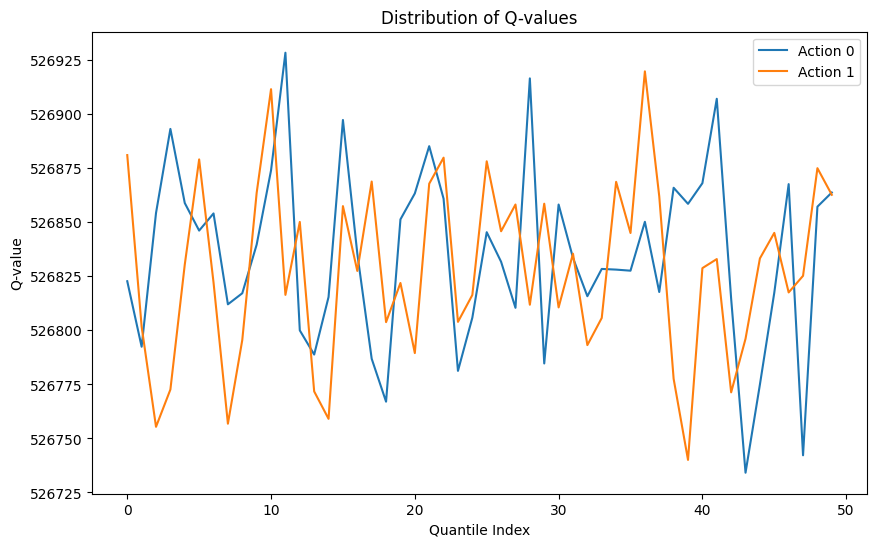

In [5]:
# Create environment and agent
env = create_environment(env_name)
agent = Agent(env.observation_space.shape[0], env.action_space.n, num_quantiles, lr, gamma, cvar_alpha)
agent.model.load_state_dict(torch.load(model_path))

# Display Q-values for a sample state
state, _ = env.reset()
state_tensor = torch.FloatTensor(state).unsqueeze(0)
quantiles = agent.model(state_tensor)
q_values = quantiles.mean(dim=-1).detach().numpy()
print("Q-values for the sample state:", q_values)

# Plot the distribution of Q-values
plt.figure(figsize=(10, 6))
for action in range(env.action_space.n):
    plt.plot(quantiles[0, action, :].detach().numpy(), label=f'Action {action}')
plt.xlabel('Quantile Index')
plt.ylabel('Q-value')
plt.title('Distribution of Q-values')
plt.legend()
plt.show()